# What Determines the Choice of a College Major?

## Abstract

- The aim of the project is to investigate **what college majors pay the most and how this is related to their popularity among general population**. Choosing a college major is one of the most important decisions made in life and hence prudent and multi-dimensional approach should be used, when making this decision. The results of our research may potentially add value to such decision-making process to make it more informed of the pros and cons of different majors.
- To answer these questions we introduce a dataset based on the [American Community Survey 2010-2012 Public Use Microdata Series](https://www.census.gov/programs-surveys/acs/data/pums.html). We use its modified version published in [GitHub](https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv), where misalignments in the 'Men' and 'Women' columns were corrected. The dataset considers **recent college graduates with Bachelor's degree under the age of 28** and contains a detailed breakdown of various majors median earnings by sex, the type of job, etc. The time period covered is 2010-12 - even though it may seem outdated to some extent, the basic principles and properties of education and labor markets should not have changed much over just one decade.
- At the end of our analysis we come up with the conclusion that **Engineering majors, - Petroleum Engineering in particular, - are the most lucrative** in terms of salaries, while **Psychology, Social Sciences and Humanities are the most popular** ones. Therefore, prospective salary is not the definitive factor in choosing a college major, and other factors, like intellectual curiousity, external influences, etc., may play an importnat role when making such a decision. Moreover, we found out that there is a siginificant discrepancy among males and females in their college major choices - men are more likely to choose well paid specialisations, which may be indicative of still-existent prejudices concerning genders' differing roles in the society - "earning males vs. caring females".

## Intial Data Exploration

Let's read the data dowloaded from GitHub and inspect its columns, as well as descriptive statistics.

In [1]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# create a function, which can print bold text
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# upload the dataset from GitHub
recent_grads = pd.read_csv('/Users/mac/downloads/recent-grads.txt')
# save data to Jupyter online folder
recent_grads.to_csv('Projects_data/recent_grads.csv')

# explore the data
printmd('**Column names**:')
print(recent_grads.iloc[0],'\n','\n') # print columns
printmd('**First row**:')
print(recent_grads.head(1),'\n','\n') # first row
printmd('**Descriptive statistics**:')
print(recent_grads.describe()) # get descriptive statistics

**Column names**:

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object 
 



**First row**:

   Rank  Major_code                  Major   Total     Men  Women  \
0     1        2419  PETROLEUM ENGINEERING  2339.0  2057.0  282.0   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering    0.120564           36      1976  ...        270   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534               364            193  

[1 rows x 21 columns] 
 



**Descriptive statistics**:

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

From the above tables we may note that the major unit of observation is college majors with corresponding values for total number of graduates, their sex, sampled size, and finally employment and earnings statistics of recent graduates under the age of 28.

There might be rows with empty values, so we get rid of them before starting our analysis.

In [2]:
# Print the number of rows in the original dataset
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

# drop rows with empty values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count) # print the resulting number of rows

173
172


## The Most Popular Majors Are Not Paying the Highest

We can start our analysis by investigating relationships among major variables of our interest, so that to understand the general properties of the data under consideration.

First, let's explore how the size of samples out of each major corresponds to median earnings and unemloyment rate. In general, the larger the sample size of a particular major, the larger the total number of graduates with that major - therefore, we may extrapolate information collected on samples on the whole population of graduates, cosidered in our dataset.

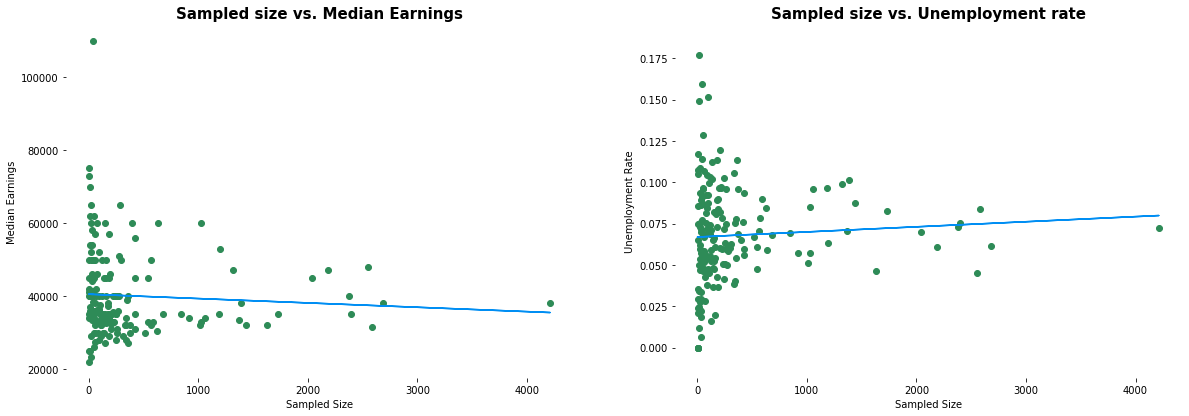

In [3]:
# Set figure and subplot positions
fig = plt.figure(figsize=(20,6.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# create scatter plot and set axis' lables
ax1.scatter(recent_grads['Sample_size'],recent_grads['Median'],color='#2e8b57')
ax1.set_xlabel('Sampled Size')
ax1.set_ylabel('Median Earnings')
ax1.set_title('Sampled size vs. Median Earnings', fontweight="bold", fontsize = 15)
# make trend by creating a fitted line
x = recent_grads['Sample_size']
y = recent_grads['Median']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"#008ef3")
# get rid of box line
ax1.set_frame_on(False)

# create scatter plot and set axis' lables
ax2.scatter(recent_grads['Sample_size'],recent_grads['Unemployment_rate'],color='#2e8b57')
ax2.set_xlabel('Sampled Size')
ax2.set_ylabel('Unemployment Rate')
ax2.set_title('Sampled size vs. Unemployment rate', fontweight="bold", fontsize = 15)
# make trend by creating a fitted line
x = recent_grads['Sample_size']
y = recent_grads['Unemployment_rate']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x,p(x),"#008ef3")
# get rid of box line
ax2.set_frame_on(False)

# show created plots
plt.show()

From the two plots above it is possible to note that there is a weak negative correlation (as shown by the trend line) between the sample sizes of different majors and median earnings, as well as employment rate - i.e. the smaller the sample, the higher the earnings and also employment. This in turn means that less popular majors are related to rather higher income, and comparatively higher chances of finding a decent job. The first part of the observation looks counter-intuitive at the first sight - rational people should in theory make choices, which would maximize their future utility in terms of salary. Therefore, we should explore further what majors are chosen the most and what reasons are behind such decisions. For this it is especially important to consider **two outliers** - one with extremely high earnings and low sample size (i.e. population size), and another with extremely high population and low earnings.

Second, we want to figure out how median earnings of graduates with various majors are related to unemployment and underemployment rates inherent to those specialisations. This way we may figure out if less paid majors can be considered on average "safe haven" - i.e. less job competition and security at the cost of lower salary.

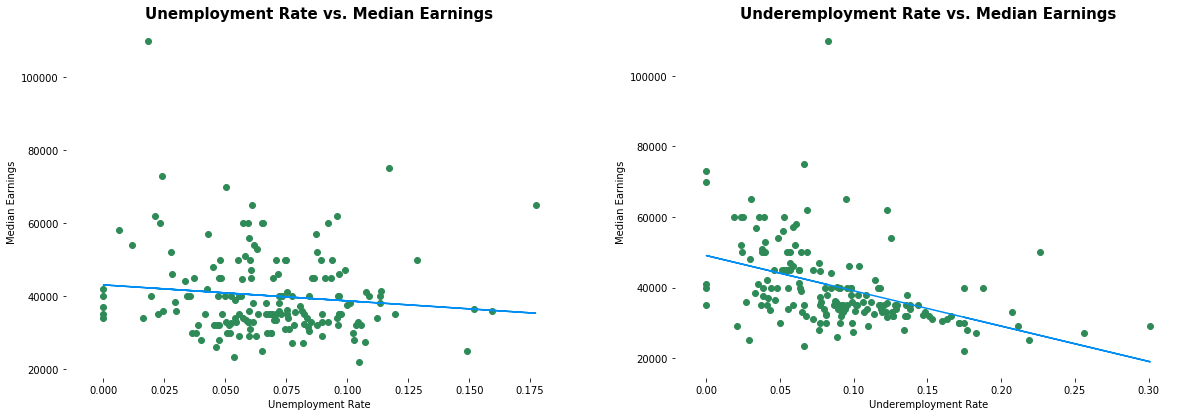

In [4]:
# Set figure and subplot positions
fig = plt.figure(figsize=(20,6.5))
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)

# create scatter plot and set axis' lables
ax3.scatter(recent_grads['Unemployment_rate'],recent_grads['Median'],color='#2e8b57')
ax3.set_xlabel('Unemployment Rate')
ax3.set_ylabel('Median Earnings')
ax3.set_title('Unemployment Rate vs. Median Earnings', fontweight="bold", fontsize = 15)
# make trend by creating a fitted line
x = recent_grads['Unemployment_rate']
y = recent_grads['Median']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax3.plot(x,p(x),"#008ef3")
# get rid of box line
ax3.set_frame_on(False)

# create scatter plot and set axis' lables
ax4.scatter(recent_grads['Low_wage_jobs']/recent_grads['Total'],recent_grads['Median'],color='#2e8b57')
ax4.set_xlabel('Underemployment Rate')
ax4.set_ylabel('Median Earnings')
ax4.set_title('Underemployment Rate vs. Median Earnings', fontweight="bold", fontsize = 15)
# make trend by creating a fitted line
x = recent_grads['Low_wage_jobs']/recent_grads['Total']
y = recent_grads['Median']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax4.plot(x,p(x),"#008ef3")
# get rid of box line
ax4.set_frame_on(False)

# show created plots
plt.show()

The left plot above shows a surprisingly weak negative correlation between median earnings and unemployment observed in different majors. It means that even in majors with comparatively high unemployment (10% and higher) median earnings don't drop much with few exceptions - i.e. people with any kind of higher education are likely to have some sort of earnings floor level. Therefore, those with college degrees might be in more advantageous position on the labor market, as compared to people with just a high school dimploma, *ceteris paribus*.

The plot on the right side reveals a much stronger correlation between underemployment rate and median earnings in our dataset. Henceforth, graduates with majors, where median earnings are lower are at a higher risk of facing underemployment. This is a quite intuitive point generally confirmed by our case as well. On balance, graduates with less paid majors are on average more likely to be underemployed or unemployed, and their majors cannot be considered a "safe heaven" option.

Third, we would like to inspect the relationship between graduates' sex and median earnings. There could be some significant differences between these two subsets of the total population, and we would be better off knowing about them.

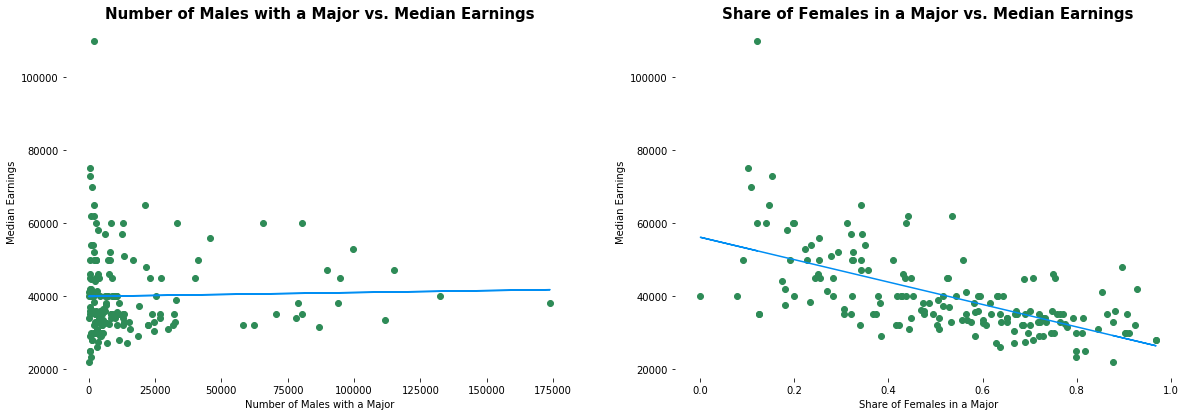

In [5]:
# Set figure and subplot positions
fig = plt.figure(figsize=(20,6.5))
ax5 = fig.add_subplot(1,2,1)
ax6 = fig.add_subplot(1,2,2)

# create scatter plot and set axis' lables
ax5.scatter(recent_grads['Men'],recent_grads['Median'],color='#2e8b57')
ax5.set_xlabel('Number of Males with a Major')
ax5.set_ylabel('Median Earnings')
ax5.set_title('Number of Males with a Major vs. Median Earnings', fontweight="bold", fontsize = 15)
# make trend by creating a fitted line
x = recent_grads['Men']
y = recent_grads['Median']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax5.plot(x,p(x),"#008ef3")
# get rid of box line
ax5.set_frame_on(False)

# create scatter plot and set axis' lables
ax6.scatter(recent_grads['ShareWomen'],recent_grads['Median'],color='#2e8b57')
ax6.set_xlabel('Share of Females in a Major')
ax6.set_ylabel('Median Earnings')
ax6.set_title('Share of Females in a Major vs. Median Earnings', fontweight="bold", fontsize = 15)
# make trend by creating a fitted line
x = recent_grads['ShareWomen']
y = recent_grads['Median']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax6.plot(x,p(x),"#008ef3")
# get rid of box line
ax6.set_frame_on(False)

# show created plots
plt.show()

From the above output we may conclude that university majors' popularity among men in absolute numbers is related to higher median earnings to some small extent. Hovewer in relative terms females far more often have less paid majors - the higher the females' share in a particular specialisation, the lesser the median earnings observed. Therefore, we may conclude that there are singificant differences related to gender, which we should pay attention to in our further analysis.

Fourth, we explore further the frequency distributions of variables in our dataset.

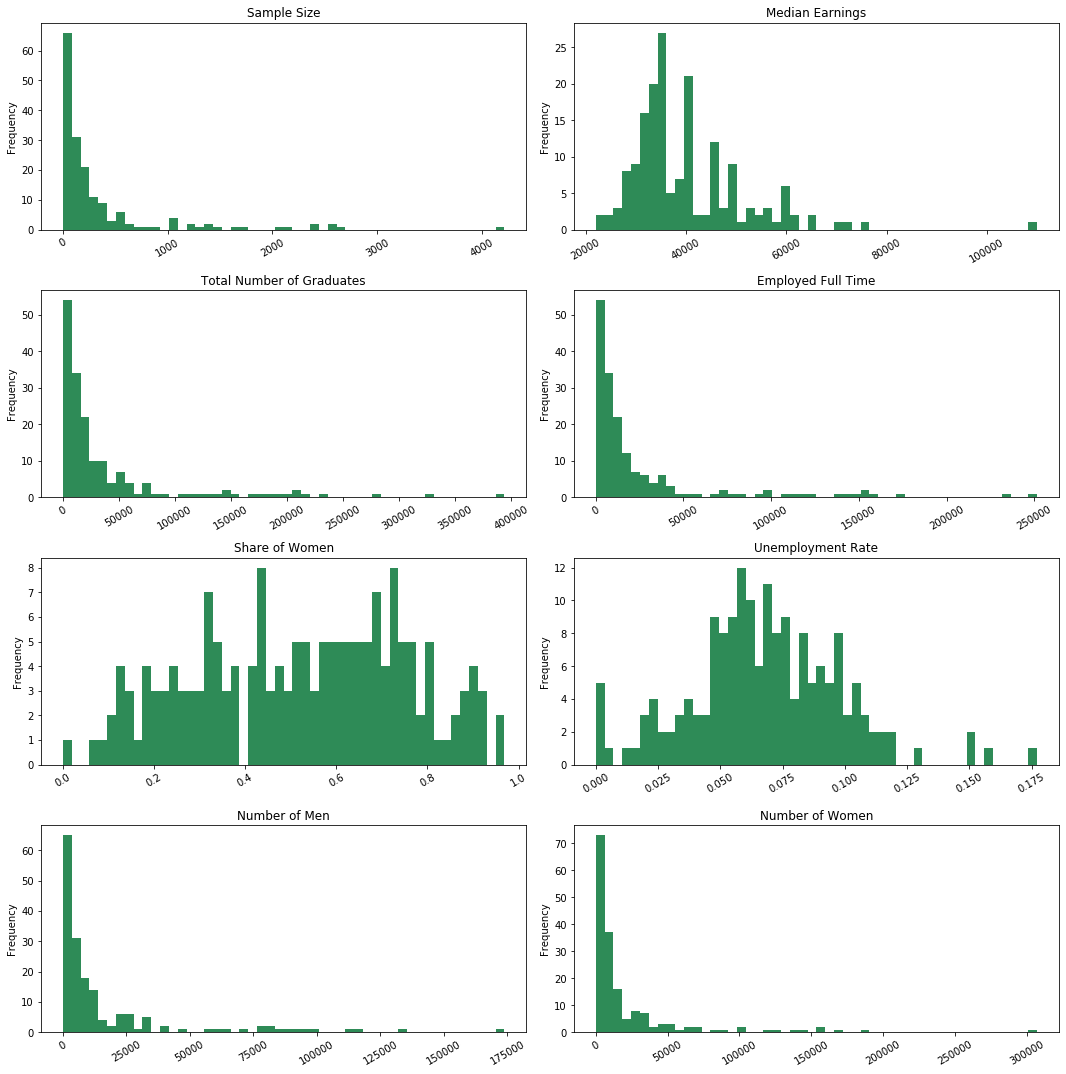

In [6]:
# Set list of columns to be shown on graphs
cols = ["Sample_size", "Median", "Total", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
# set list of corrected names of those columns
cols_renamed = ["Sample Size", "Median Earnings", "Total Number of Graduates", 
                "Employed Full Time", "Share of Women", "Unemployment Rate", "Number of Men", 
                "Number of Women"]

# set figure with defined size
fig = plt.figure(figsize=(15,15))
# loop through the list of columns to create histograms
for i in range(0,8):
    ax = fig.add_subplot(4,2,i+1) # create subplot positions
    fig.tight_layout(pad=1.0) # make some distance between graphs
    ax = recent_grads[cols[i]].plot(kind='hist', color='#2e8b57', title = cols_renamed[i], bins=50, rot=30)

From the above results we may infer several important conclusions:
- the majority of university majors in our dataset is represented by a comparatively small number of graduates, both in total, as well as among males and females. Moreover, we have more females in our dataset in general. In addition, a few majors are represented by very high numbers;
- the distribution of median earnings looks unimodal, with the majority of graduates with various majors having their correponding median salaries up to the level slightly above 40k. However, there is one blatant outlier - its value is over 100k;
- the frequency distributions of the total number of graduates and those employed full time are very similar, which implies that graduates in general are able to find employment, and in most cases it is full time;
- unemployment in the majority of majors considered in our dataset is in the range of 5% - 10%;
- females generally prevail in many majors considered.

## Engineering Is the Most Paying Major, but Psychology Is the Most Popular

After investigating the general properties of various majors, let's explore what majors are the most lucrative in terms of salary and accessible employment opportunities.

We start with figuring out the highest and the lowest paying majors in terms of median earnings.

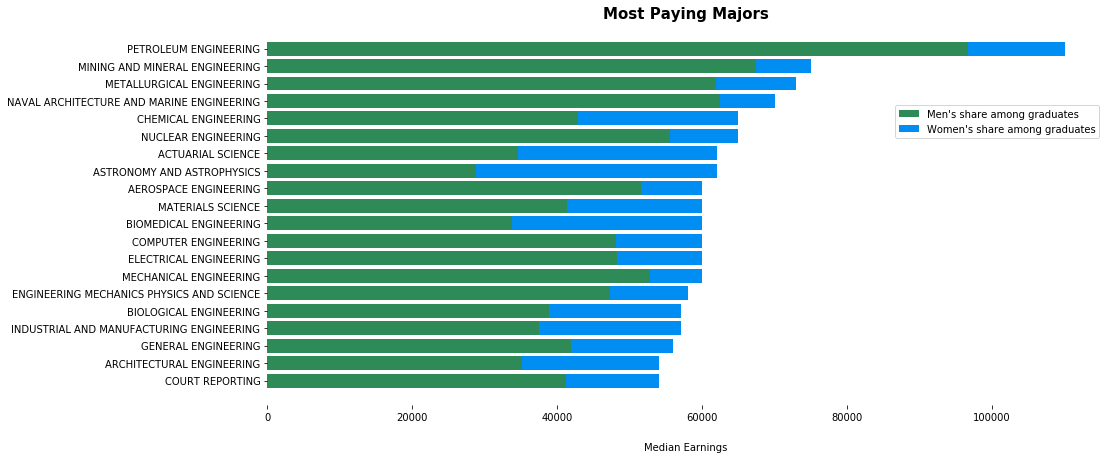

In [7]:
# Set figure with defined size
fig = plt.figure(figsize=(15,7))

# sort majors by median earnigns in ascending order
recent_grads_sorted = recent_grads.sort_values(by=['Median'],ascending=True)
# consider only the last 20 rows with the highest values
recent_grads_sorted = recent_grads_sorted.tail(20)
# create a new column, which reflects females' share in corresponding majors
recent_grads_sorted['ShareWomenInMedian'] = recent_grads_sorted['ShareWomen']*recent_grads_sorted['Median']
# create a new column, which reflects males' share in corresponding majors
recent_grads_sorted['ShareMenInMedian'] = recent_grads_sorted['Median'] - recent_grads_sorted['ShareWomenInMedian']
# set two barplots with highest median earnings, which also reflect gender distribution
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['ShareMenInMedian'], 
         label = "Men's share among graduates", color="#2e8b57")  
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['ShareWomenInMedian'], 
         left=recent_grads_sorted['ShareMenInMedian'], label = "Women's share among graduates", color="#008ef3")

# get rid of box line
plt.box(False)

# set title and lables names, as well as legend position
plt.title('Most Paying Majors', fontweight="bold", fontsize = 15)
plt.xlabel('Median Earnings',labelpad=20)
plt.legend(bbox_to_anchor=(1, 0.8))

# show created plot
plt.show()

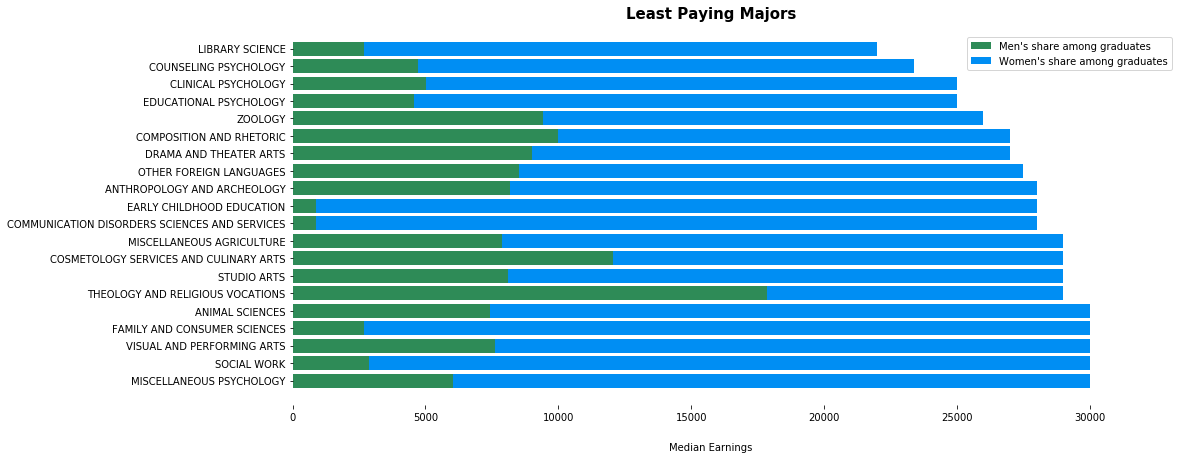

In [8]:
# Set figure with defined size
fig = plt.figure(figsize=(15,7))

# sort majors by median earnigns in descending order
recent_grads_sorted = recent_grads.sort_values(by=['Median'],ascending=False)
# consider only the last 20 rows with the lowest values
recent_grads_sorted = recent_grads_sorted.tail(20)
# create a new column, which reflects females' share in corresponding majors
recent_grads_sorted['ShareWomenInMedian'] = recent_grads_sorted['ShareWomen']*recent_grads_sorted['Median']
# create a new column, which reflects males' share in corresponding majors
recent_grads_sorted['ShareMenInMedian'] = recent_grads_sorted['Median'] - recent_grads_sorted['ShareWomenInMedian']
# set two barplots with lowest median earnings, which also reflect gender distribution
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['ShareMenInMedian'], 
         label = "Men's share among graduates", color="#2e8b57")  
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['ShareWomenInMedian'], 
         left=recent_grads_sorted['ShareMenInMedian'], label = "Women's share among graduates", color="#008ef3")

# get rid of box line
plt.box(False)

# set title and lables names, as well as legend position
plt.title('Least Paying Majors', fontweight="bold", fontsize = 15)
plt.xlabel('Median Earnings',labelpad=20)
plt.legend(bbox_to_anchor=(0.8, 0.98))

# show created plot
plt.show()

The output charts clearly show us that among the top 20 highest paying majors almost all are from the Engineering category. Moreover, the Petroleum Engineering major is unanimously the most lucrative one - the median earnings of such graduates is well over 100k per year. On the other end of the spectrum is Library Science, as well as some psychology and humanity majors - the range of median earnings of graduates with these specialisations ranges within 20k - 30k per year. It is noteworthy that females' share among graduates with poorly paid majors is far larger than among those with money-making ones. This can be probably explained both by the innate inclination of many females towards humanities and social-oriented specialisations, as well as by the traditional perception of their role in the society.

Note that there are 172 college majors in our dataset, but they may also be classified into 16 categories. This would allow us to undertake aggregate analysis to derive characteristics of groups of majors, which could be of importance for our research objectives. Let's first inspect how many majors are within each of these categories.

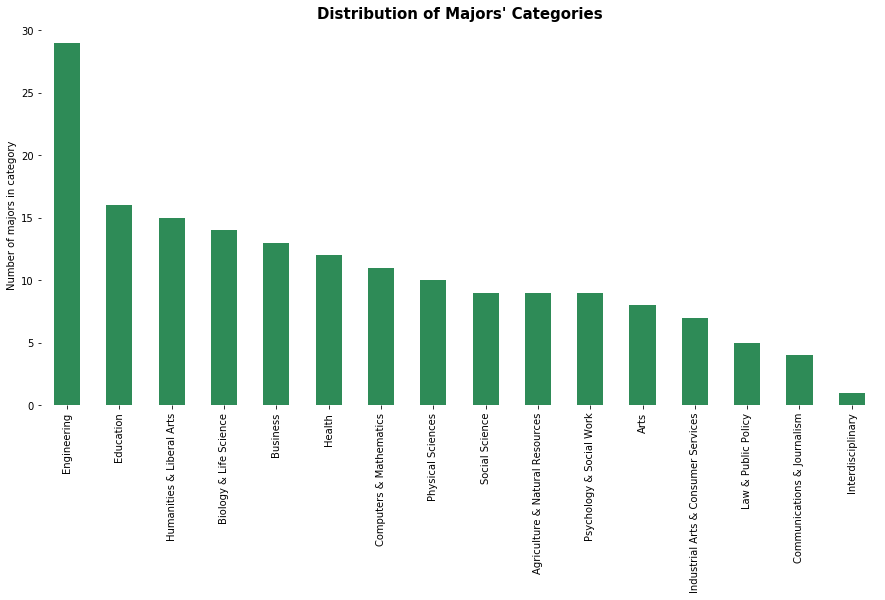

In [9]:
# Create a histogram with frequences of unique values within the 'Major_category' column
ax7 = recent_grads['Major_category'].value_counts(ascending=False).plot(kind='bar', 
                          color='#2e8b57', figsize=(15,7))

# set title name, axis labels and get rid of box line
plt.title("Distribution of Majors' Categories", fontweight="bold", fontsize = 15, y=1)
ax7.set(ylabel="Number of majors in category")
plt.box(False)

# show created plot
plt.show()

Evidently, the largest number of majors is in the Engineering category, while the smallest is in the Interdisciplinary category.

Having this in mind, we can proceed further with dissecting how median earnings are distributed among different categories of majors. This might be a convenient way to inspect the distribution of this variable among colelge majors. 

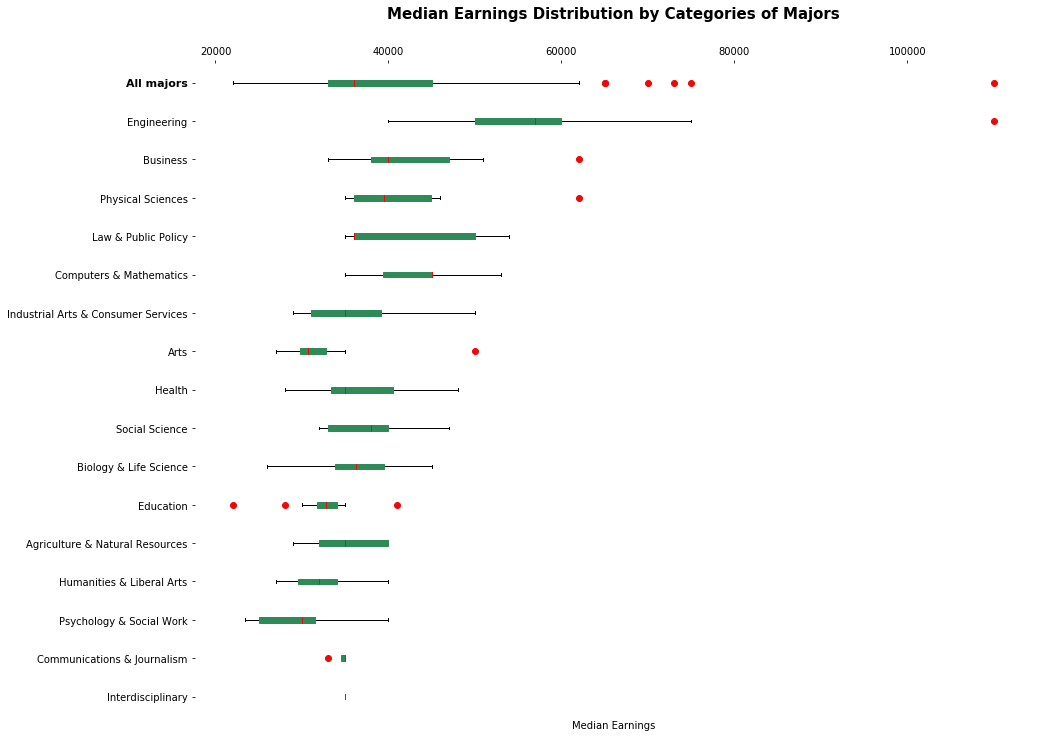

In [10]:
# Set figure and subplot
fig = plt.figure(figsize=(15,12))
ax = plt.subplot(111)

# loop through the range of major categories to create boxplots of median earnings for each category
for i in range(len(recent_grads['Major_category'].unique())):
    data_for_box = recent_grads[recent_grads['Major_category']==recent_grads['Major_category'].unique()[i]]['Median']
    ax.boxplot(data_for_box, positions = [len(recent_grads['Major_category'].unique())-i], vert=False, patch_artist=True, 
    boxprops=dict(facecolor='#2e8b57', color='#2e8b57'), medianprops=dict(color='#ed0909'), 
               flierprops=dict(markerfacecolor='#ed0909', markeredgecolor='#ed0909')) # set colors for boxplots
    ax.set_yticklabels(recent_grads['Major_category'].unique()) # create ticks for each major group

# create median earnings boxplot for the total of all categories and put it on the first line in the graph
ax.boxplot(recent_grads['Median'], labels = ' ', positions = [len(recent_grads['Major_category'].unique())+1], 
           vert=False, patch_artist=True, boxprops=dict(facecolor='#2e8b57', color='#2e8b57'), 
           medianprops=dict(color='#ed0909'), flierprops=dict(markerfacecolor='#ed0909', markeredgecolor='#ed0909'))

# set name for the total of all majors
ax.text(-0.082, 0.978, 'All majors', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', fontweight="bold")

# set graph and ticks titles, put x ticks on top
plt.title('Median Earnings Distribution by Categories of Majors', fontweight="bold", fontsize = 15, y=1.06) 
ax.xaxis.tick_top()
plt.xlabel('Median Earnings')

# get rid of box line
plt.box(False)

# show created graph
plt.show()

It is possible to note that besides the total median earnings distribution, Engineering also exhibits very volatile values to some extent due to the largest number of different majors included in this category. The rightmost outlier is Pertoleum Engineering, as we know from the previous results. Business, Physical Sciences, Law and Public Policy, as well as Computers and Mathematics might also be quite lucrative, but still these categories are not comparable to Engineering in general. On the other side of the spectrum we may primarily see humanities and psycology categories. 

Now that we know what majors exactly are paid the most, let's investigate their popularity, as measured by the total number of graduates, and also explore the distribution of males and females.

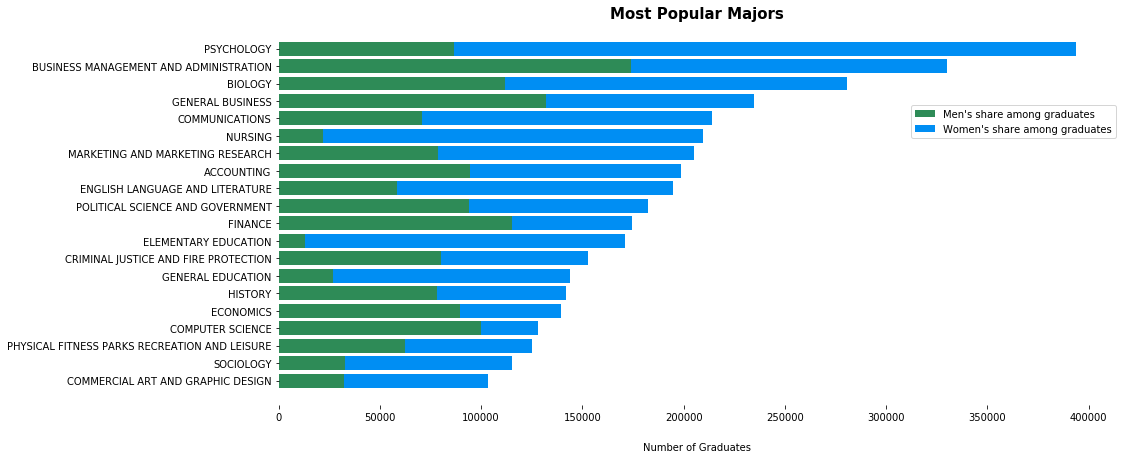

In [11]:
# Set figure and its size
fig = plt.figure(figsize=(15,7))

# sort majors by the number of graduates in ascending order
recent_grads_sorted = recent_grads.sort_values(by=['Total'],ascending=True)
# consider only the last 20 rows with the highest values
recent_grads_sorted = recent_grads_sorted.tail(20)

# create two barplots for majors with the highest number of graduates, separately for males and females
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['Men'], 
         label = "Men's share among graduates", color="#2e8b57")  
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['Women'], 
         left=recent_grads_sorted['Men'], label = "Women's share among graduates", color="#008ef3")

# get rid of box line
plt.box(False)

# set plot title and tick names
plt.title('Most Popular Majors', fontweight="bold", fontsize = 15, y=1)
plt.xlabel('Number of Graduates',labelpad=20)
plt.legend(bbox_to_anchor=(0.75, 0.8)) # set legend position

# show created plot
plt.show()

Quite surprisingly, psychology, which is one of the least paid majors, is the top choice among the population considered in our dataset. It is followed by applied specialisations in business and humanities. On balance, we may encounter some well paid majors in this list, but none of them is from the Engineering category. Quite noteworthy is the fact, that the majority of the graduates with these majors are females (the exceptions are finance and computer science) - it supports the hypothesis that their choice depends to a lesser extent on prospective earnings, as compared to males.

It would be also interesting to inspect what majors are least popular, and whether there are money making ones among them.

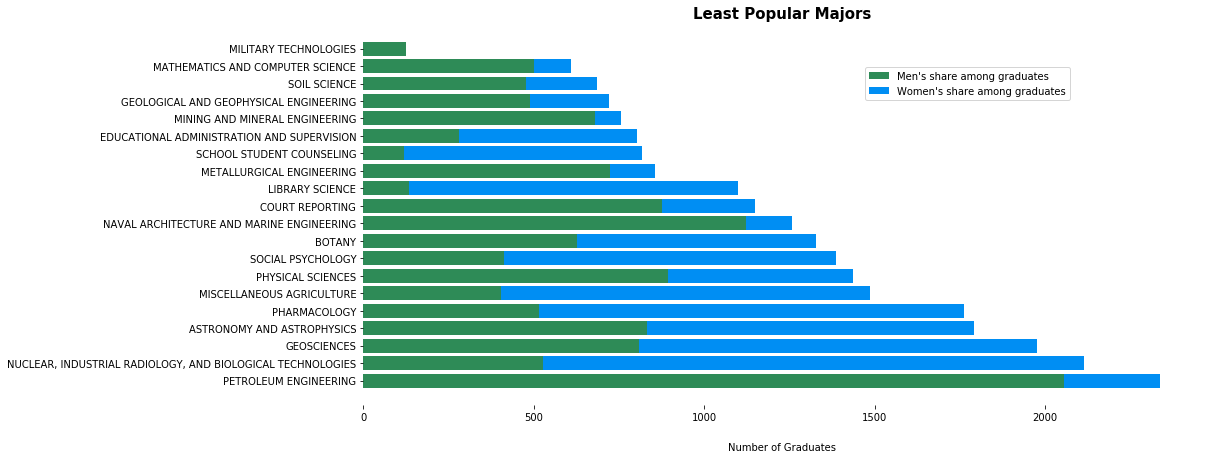

In [12]:
# Set figure and its size
fig = plt.figure(figsize=(15,7))

# sort majors by the number of graduates in descending order
recent_grads_sorted = recent_grads.sort_values(by=['Total'],ascending=False)
# consider only the last 20 rows with the lowest values
recent_grads_sorted = recent_grads_sorted.tail(20)

# create two barplots for majors with the highest number of graduates, separately for males and females
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['Men'], 
         label = "Men's share among graduates", color="#2e8b57")  
plt.barh(recent_grads_sorted['Major'], recent_grads_sorted['Women'], 
         left=recent_grads_sorted['Men'], label = "Women's share among graduates", color="#008ef3")

# get rid of box line
plt.box(False)

# set plot title and tick names
plt.title('Least Popular Majors', fontweight="bold", fontsize = 15, y=1)
plt.xlabel('Number of Graduates',labelpad=20)
plt.legend(bbox_to_anchor=(0.85, 0.9))

# show created plot
plt.show()

From the above table we may conclude that the least popular major is military technologies, which is unsuprisingly totally dominated by men. Overall, the list of the least popular majors is full of engineering and science specialisations, among which there are those paying the highest earnings - Petroleum Engineering, Mining and Mineral Engineering and some others. So an important question to answer is why these lucrative specialisations are so unpopular.

The obvious answer applicable primarily to Petroleum Engineering and Mining and Mineral Engineering majors, and which is rather qualitative in its nature, is that such specialisations assume very long and unscheduled working hours in barren places and the high degree of career's path dependency. But this explanation doesn't work well with other engineering and science majors, which pay off so well.

## Popular Majors Entail Higher Risks

Another possible answer to this question might be the difficulty of finding a job corresponding to the university major of a graduate - lucrative job opportunities should in theory be scarce and highly competitive. Luckily, in our dataset there are data concerning unemployment and low paying service jobs - the latter might be considered as underemployment.

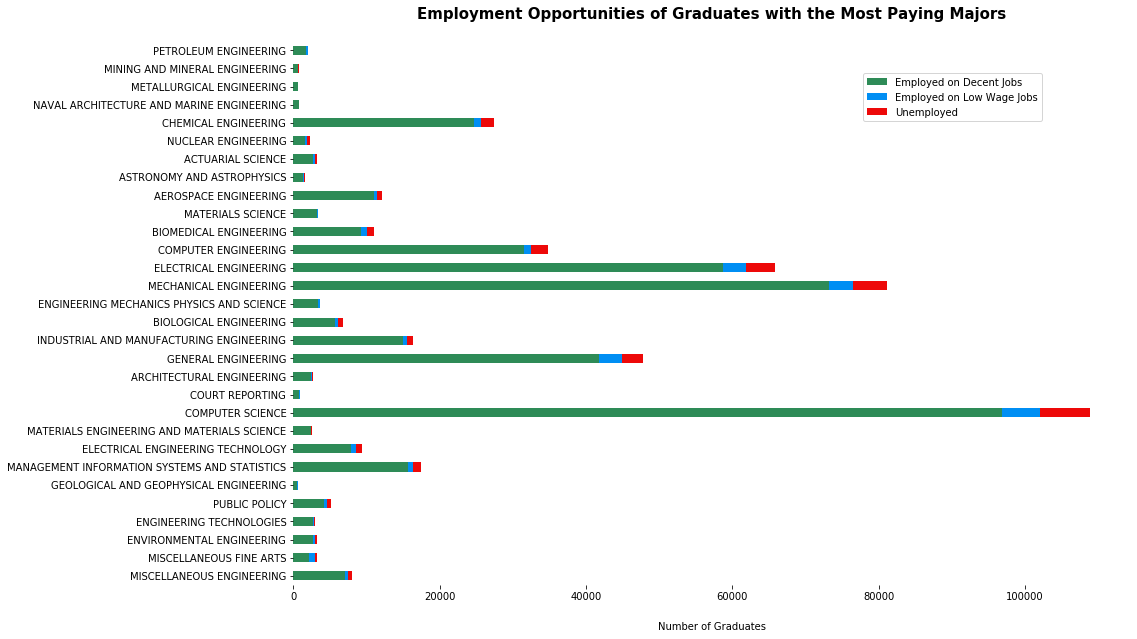

In [13]:
# Sort majors by median earnings in ascending order, create a new column for
# the number of employed without underemployment and consider only majors with the highest earnings
recent_grads_sorted = recent_grads.sort_values(by=['Median'],ascending=True)
recent_grads_sorted['Employed_wo_low_wage'] = recent_grads_sorted['Employed'] - recent_grads_sorted['Low_wage_jobs']
recent_grads_sorted = recent_grads_sorted.tail(30)

# create a DataFrame with three variables
ax = recent_grads_sorted[['Employed_wo_low_wage', 'Low_wage_jobs', 'Unemployed']]
# create stacked bar plot out of three columns
ax.plot.barh(stacked = True, width=0.5, color=["#2e8b57","#008ef3","#ed0909"], figsize=(15,10))

# get rid of box lines
plt.box(False)

# set title and ticks
plt.title('Employment Opportunities of Graduates with the Most Paying Majors', 
          fontweight="bold", fontsize = 15, y=1.03)
plt.xlabel('Number of Graduates',labelpad=20)

# modify ticks, which are originally numbers
locs, labels=plt.yticks()
plt.yticks(locs, recent_grads_sorted['Major'])
# set legend names and its position
plt.legend(['Employed on Decent Jobs', 'Employed on Low Wage Jobs', 'Unemployed'], 
           bbox_to_anchor=(0.9, 0.95))

# show created graph
plt.show()

The above results do not support our initial conjecture - there is no much unemployment or underemployment among the highest paying majors - with a few exceptions engineering specialisations in general allow finding a decent job. Moreover, unemployment seems to be on its natural level for almost all majors besides Computer Science, Mechanical Engineering and Electrical Engineering.

Let's explore the same characteristics of the most popular majors, as measured by the number of respective graduates.

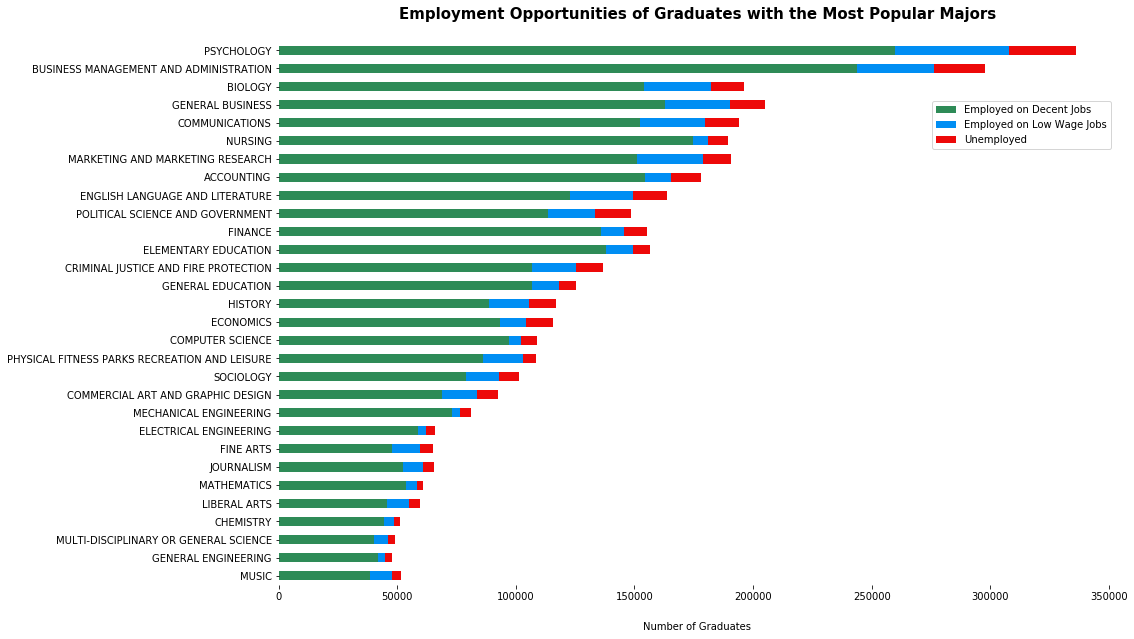

In [14]:
# Sort majors by number of graduates in ascending order, create a new column for
# the number of employed without underemployment and consider only majors with the highest earnings
recent_grads_sorted = recent_grads.sort_values(by=['Total'],ascending=True)
recent_grads_sorted['Employed_wo_low_wage'] = recent_grads_sorted['Employed'] - recent_grads_sorted['Low_wage_jobs']
recent_grads_sorted = recent_grads_sorted.tail(30)

# create a DataFrame with three variables
ax = recent_grads_sorted[['Employed_wo_low_wage', 'Low_wage_jobs', 'Unemployed']]
# create stacked bar plot out of three columns
ax.plot.barh(stacked = True, width=0.5, color=["#2e8b57","#008ef3","#ed0909"], figsize=(15,10))

# get rid of box lines
plt.box(False)

# set title and ticks
plt.title('Employment Opportunities of Graduates with the Most Popular Majors', 
          fontweight="bold", fontsize = 15, y=1.03)
plt.xlabel('Number of Graduates',labelpad=20)

# modify ticks, which are originally numbers
locs, labels=plt.yticks()
plt.yticks(locs, recent_grads_sorted['Major'])
# set legend names and its position
plt.legend(['Employed on Decent Jobs', 'Employed on Low Wage Jobs', 'Unemployed'], bbox_to_anchor=(1, 0.9))

# show created graph
plt.show()

The corresponding data on most popular specialisations show us that such graduates more likely to be underemployed or even unemployed. Therefore, it is not possible to explain their choice by higher future chances of finding employment and less competition in the related field. Unfortunately, we don't have other data in our dataset, which could allow us to dive into this question deeper from the quantitative perspective, - only qualitative elaborations over the issue are possible so far. Otherwise, the data on the types of schools attended by graduates (elite vs. non-elite) might have shed some light on the differences in choices made by graduates at the time of admissions.

# Conclusion

The main aim of this project is to determine what majors pay the most using the data from American Community Survey 2010-2012 Public Use Microdata Series. We found out that **Engineering majors** were the most lucrative around 2010-s, but not the most popular. Quite prominent is the case of the **Petroleum Engineering major**, which is clearly the **highest paying** one, but at the same time is **among the least popular** specialisations (due to a greater career path dependency and peculiar work schedule). The investigation also showed that the employment prospects for graduates with such majors are also quite abundant - unemployment and underemployment are rather rare there. On the other hand, graduates with the most popular majors (e.g. Psychology, Business, Humanities) are more likely to end up unemployed or underemployed - supply is more likely to exceed demand on these segments on the labor market. It is also noteworthy, that there are significantly more female graduates in our dataset as compared to males, and while there is some positive correlation between majors' popularity and future earnings potential among men, the overall results of the analysis are **influenced more by females' choice**.

An appealing question that arises out of the results of this analysis is why so many males and females choose majors that are not paying the most. Economic theory would suggest that being rational agents they should maximize their future potential income by making the optimal choice now, which is evidently not the case in reality. There several potential reasons worth of further consideration:
- the prospective students are not informed well about the future earning prospects of the specialisations they choose and not mature enough to consider all pros and cons properly;
- the top students which are always a minority would in general choose more prestigious and effort-intensive majors, which enhance their general capabilties and talents further, so that they perform very well on the job and thus earn even more. This in turn makes those majors' median earnings higher than otherwise - i.e. when all the students and graduates were the same in terms of their skills and capabilities;
- there are significant barriers to enter STEM fields - first, it often requires good mathematical preparation and, second, these specialisations are still considered male-only, and females may have more gender specific difficulties to enter into these fields;
- the majority of students are concerned more with non-monetary benefits of chosen majors - pure curiosity about a particular subject, altruistic considerations, willingness to help and care about other people might be decisive among certain groups of individuals, especially females. Moreover, considering the level of welfare of the American society, the necessity to earn more at all costs is no more an imperative there, which is quite appealing to Maslow's hierarchy of needs;
- the popularity of psychology might be explained by its perceived applicability in daily life and apparently lesser academic rigour, as compared to STEM specialisations;
- the popularity of humanities, business-related fields and social sciences might be due to a wider variety of jobs accessible to such graduates - such careers are less path dependent and more flexible, as compared to many STEM specialisations;
- due to the fact that only Bachelor's degrees were considered in our dataset we cannot extrapolate our conclusions beyond the specific population considered. First, the distribution of earnings of the young professionals under the age of 28 might be quite different from that of their middle-aged counterparts *ceteris paribus*. Second, many graduates with low paying Bachelor's majors may actually proceed further with graduate degrees (including those of the same subject), which may significantly increase their earnign potential;
- the prevalence of women in particular majors might have the potential of a decrease or even a slump in the prestige and earning ceiling of that specialisation. As Sarah Green Carmichael notes in her [HBR article](https://hbr.org/2017/04/women-dominate-college-majors-that-lead-to-lower-paying-work): "HR, once considered the most glamorous department to work in, has since become highly feminized, and must now fight for respect at the C-suite table." Elaborating on this topic would lead us to the general perception of females' role in our society, where they are just not assumed to earn much - there is still much work ahead to completely eliminate obsolete views of the patriarchal past.

All in all, the rational choice theory based only on the earnings perspective doesn't seem to work well with this particular dataset. It seems plausible to try extrapolating these results on the general population (i.e. whole society), at least to some extent and confess, that in such important, life-long decisions as choosing majors people might be **guided more by their intellectual curiousity or, let's say, heart, than by potential future salaries**. But many of the choices considered may also be stipulated by far more prosaic reasons - **unwillingness** to study rigourous and thought-intensive "hard" subjects, like math, as well as **opinions** imposed by others, particularly parents, teachers and peers.

The data considered cover 2010-12 time period, hence the results of our analysis might seem outdated from the 2020 perspective. In our ever-changing world the only constant is the change, but engineering and tech related majors, i.e. STEM, are likely to dominate the post-graduation earnings landscape in the medium term, with computer science and related fields, like data analytics, becoming more and more "sexy" in terms of potential salaries and career prospects. Hopefully, new researches on gender distribution among majors will show less inequality in terms of career opportunities and earnings, so that we could spot the improvements made on the road towards transparent and just society free of superstitions and obsolete views, with equal opportunity for everybody.